# SOK-1006 V23
## Arbeidskrav 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp # laster inn data

df=pd.read_csv("https://uit-sok-1006-v23.github.io/data/suits_watermelons.csv",delimiter=";") # Kode fra notater forelesning 4

df

,Year,log q,log h,log p,log p_c,log p_v,log w,log n,log(y/n),log p_f
0,1930,4.448623,4.379545,4.761777,2.247338,0.845054,3.366401,4.812434,6.403531,2.535163
1,1931,4.356519,4.333493,4.614410,1.733858,2.726278,3.136141,4.819342,6.244651,2.546676
2,1932,4.204548,4.054879,4.368032,1.874316,2.588122,2.832198,4.826250,5.966037,2.599635
3,1933,4.031853,4.008827,4.531517,2.318718,2.286482,2.772330,4.833157,5.896959,2.645687
4,1934,4.096325,4.094023,4.644344,2.514439,1.475967,2.917394,4.840065,6.018996,2.624964
5,1935,4.195337,4.156193,4.563753,2.406217,1.892737,2.970354,4.844670,6.129521,2.710160
6,1936,4.135470,4.128562,4.851578,2.514439,1.897342,2.995683,4.853881,6.246954,2.703252
7,1937,4.262113,4.225271,4.662765,2.129905,2.079248,3.113115,4.858486,6.311427,2.705555
8,1938,4.259810,4.202245,4.690396,2.150628,3.044037,3.090089,4.865394,6.226230,2.753910
9,1939,4.144680,4.137772,4.777895,2.208193,1.701621,3.113115,4.874604,6.288401,2.691739


## 7.1 

#### 1) To make charts that look like those in Figure 1 in the paper, you need to convert the relevant variables to their actual values.
* a) Create two new variables containing the actual values of P and Q.
* b) Plot separate line charts for P and Q, with time (in years) on the horizontal axis. Make sure to label your vertical axes appropriately. Your charts should look the same as Figure 1 in the paper.

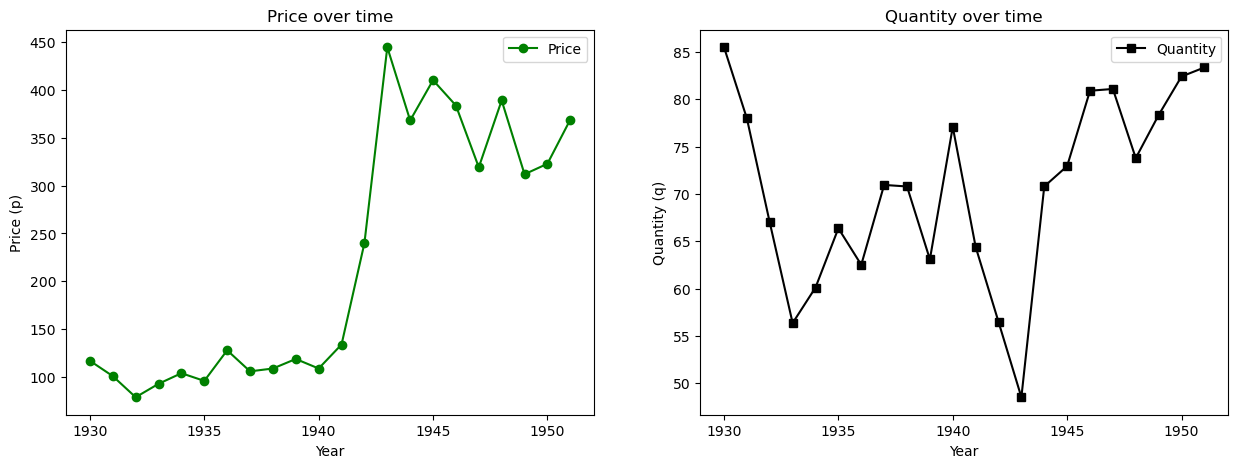

In [2]:
# Kode hentet fra pandas.pydata.com
df["P"] = np.exp(df['log p'])
df["Q"] = np.exp(df['log q'])

# plotter figurer. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
ax1.plot(df["Year"], df["P"], label = "Price", color = "green", marker = "o")
ax1.set_xlabel("Year")
ax1.set_ylabel("Price (p)")
ax1.legend()
ax1.set_title("Price over time")

ax2.plot(df["Year"], df["Q"], label = "Quantity", color = "black", marker = "s")
ax2.set_xlabel("Year")
ax2.set_ylabel("Quantity (q)")
ax2.legend()
ax2.set_title("Quantity over time")

plt.show()

#### 2) Plot supply and demand curves
* a) Create a table as shown in Figure 7.4. The first column contains values of Q from 20 to 100, in intervals of 5. (Remember that quantity is measured in millions, so Q = 20 corresponds to 20 million watermelons.)
* b) Convert the values of Q to natural log format (second column of your table) and use these values, along with the numbers in the equations above, to calculate the corresponding values of log P for supply (third column) and demand (fourth column).
* c) Convert the log P numbers into the actual prices (fifth and sixth columns).
* d) Plot your calculated supply and demand curves on a line chart, with price (P) on the vertical axis and quantity (Q) on the horizontal axis. Make sure to label your curves (for example, using a legend).

In [3]:
# Lager df1. 
data = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
df1 = pd.DataFrame(data, columns=['Q'])

# Lager log av Q. 
df1["Log Q"] = np.log(df1["Q"])
df1["Supply (log P)"] = -2.0 + 1.7*df1["Log Q"] # Følger oppskrift på gjennomgangen for disse. 
df1["Demand (log P)"] = 8.5 - 0.82*df1["Log Q"] # Følger oppskrift. 

df1["Supply (P)"] = np.exp(df1["Supply (log P)"]) # Lager disse på samme måte som i forrige oppgave. 
df1["Demand (P)"] = np.exp(df1["Demand (log P)"])

df1 # Printer. 

,Q,Log Q,Supply (log P),Demand (log P),Supply (P),Demand (P)
0,20,2.995732,3.092745,6.043500,22.037485,421.365040
1,25,3.218876,3.472089,5.860522,32.203943,350.907208
2,30,3.401197,3.782036,5.711018,43.905322,302.178574
3,35,3.555348,4.044092,5.584615,57.059336,266.297629
4,40,3.688879,4.271095,5.475119,71.600000,238.678832
5,45,3.806662,4.471326,5.378537,87.472655,216.704952
6,50,3.912023,4.650439,5.292141,104.630920,198.768561
7,55,4.007333,4.812466,5.213987,123.034698,183.825472
8,60,4.094345,4.960386,5.142637,142.648813,171.166618
9,65,4.174387,5.096458,5.077002,163.442028,160.292847


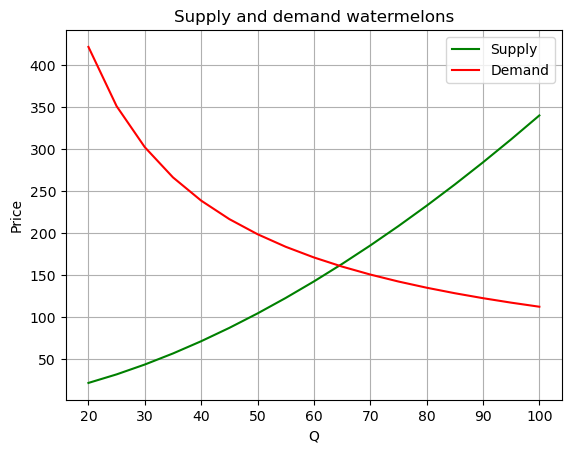

In [4]:
# Plotter figur. 
fig1, ax = plt.subplots()
plt.plot(df1["Q"], df1["Supply (P)"], label = "Supply", color = "green")
plt.plot(df1["Q"], df1["Demand (P)"], label = "Demand", color = "red")
plt.xlabel("Q")
plt.ylabel("Price")
plt.title("Supply and demand watermelons")
plt.legend()
plt.grid()

#### 3) Add the new supply curve to your line chart and interpret the outcomes, as follows:
* a) Create a new column in your table from Question 2 called ‘New supply (log P)’, showing the supply in terms of log prices after the shock. Make another column called ‘New supply (P)’ showing the supply in terms of the actual price in dollars.
* b) Add the New supply (P) values to your line chart and verify that your chart looks as expected. Make sure to label the new supply curve.

In [5]:
# Lager nye variabler. 
df1["New supply (log P)"] = -2.0 + 1.7*df1["Log Q"]+0.4
df1["New supply (P)"] = np.exp(df1["New supply (log P)"])

df1 # Printer. 

,Q,Log Q,Supply (log P),Demand (log P),Supply (P),Demand (P),New supply (log P),New supply (P)
0,20,2.995732,3.092745,6.043500,22.037485,421.365040,3.492745,32.876064
1,25,3.218876,3.472089,5.860522,32.203943,350.907208,3.872089,48.042638
2,30,3.401197,3.782036,5.711018,43.905322,302.178574,4.182036,65.499044
3,35,3.555348,4.044092,5.584615,57.059336,266.297629,4.444092,85.122526
4,40,3.688879,4.271095,5.475119,71.600000,238.678832,4.671095,106.814648
5,45,3.806662,4.471326,5.378537,87.472655,216.704952,4.871326,130.493867
6,50,3.912023,4.650439,5.292141,104.630920,198.768561,5.050439,156.090990
7,55,4.007333,4.812466,5.213987,123.034698,183.825472,5.212466,183.546201
8,60,4.094345,4.960386,5.142637,142.648813,171.166618,5.360386,212.807022
9,65,4.174387,5.096458,5.077002,163.442028,160.292847,5.496458,243.826854


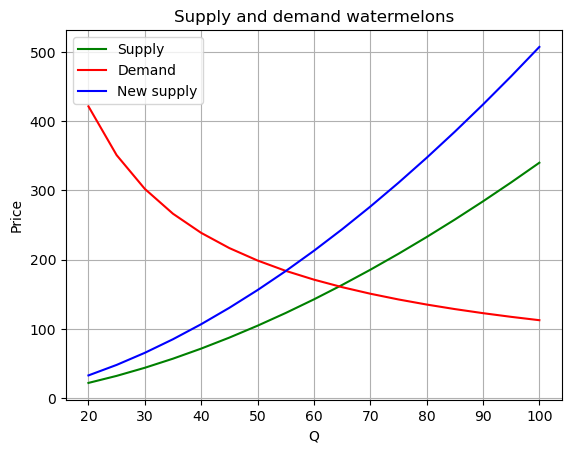

In [6]:
# Plotter figur. 
fig2, ax = plt.subplots()
plt.plot(df1["Q"], df1["Supply (P)"], label = "Supply", color = "green")
plt.plot(df1["Q"], df1["Demand (P)"], label = "Demand", color = "red")
plt.plot(df1["Q"], df1["New supply (P)"], label = "New supply", color = "blue")
plt.xlabel("Q")
plt.ylabel("Price")
plt.title("Supply and demand watermelons")
plt.legend()
plt.grid()

## 7.2 ##

#### 1. Use the supply and demand equations from Part 7.1 which are shown here, and carry out the following:
* a) Calculate the price elasticity of supply (the percentage change in quantity supplied divided by the percentage change in price) and comment on its size (in absolute value). (Hint: You will have to rearrange the equation so that log Q is in terms of log P.)
* b) Calculate the price elasticity of demand in the same way and comment on its size (in absolute value).

In [7]:
# Oppskrift fra "notater forelesning 4".  
logQ, logP = sp.symbols("logQ, logP", real = True, positive = True)
elast_s = sp.Eq(-2.0 + 1.7 * logQ, logP)

s_elast = sp.solve(elast_s,logQ)
display(s_elast) # Display() slik at den 

logQ, logP = sp.symbols("logQ, logP", real = True, positive = True)
elast_d = sp.Eq(8.5-0.82 * logQ, logP)

d_elast = sp.solve(elast_d, logQ)
display(d_elast)

# Som man ser så er "s_elast" på 0,588 % og "d_elast" på -1,21%.

[0.588235294117647*logP + 1.17647058823529]

[10.3658536585366 - 1.21951219512195*logP]

#### 2. With reference to Figure 7.6, for each variable in the supply equation, give an economic interpretation of the coefficient (for example, explain the effect on the farmers’ supply decision) and (where relevant) relate the coefficient to an elasticity.

In [9]:
data = {'Variable': ['P (price of watermelons)', 'C (price of cotton)', 'T (price of vegetables)', 'CP (cotton program)', 'WW2 (Second World War'], 
        'Coefficient': [0.580, -0.321, -0.124, 0.073, -0.360],
       '95% confidence interval': [[0.572, 0.586], [-0.328, -0.314], [-0.126, -0,122], [0.068, 0.077], [-0.365, -0.355]]}  

df3 = pd.DataFrame(data, columns=['Variable', 'Coefficient', '95% confidence interval'])
df3

# Dataframen viser elastisitet ved endring på 1% forbeholdt vannmelonen (supply).

,Variable,Coefficient,95% confidence interval
0,P (price of watermelons),0.580,"[0.572, 0.586]"
1,C (price of cotton),-0.321,"[-0.328, -0.314]"
2,T (price of vegetables),-0.124,"[-0.126, 0, 122]"
3,CP (cotton program),0.073,"[0.068, 0.077]"
4,WW2 (Second World War,-0.360,"[-0.365, -0.355]"


#### 3. Using the demand equation and Figure 7.7 below, give an economic interpretation of each coefficient and (where relevant) relate the coefficient to an elasticity.

In [10]:
data ={'Variable': ['P (price of watermelon)', 'Y/N (per capita income)', 'F (railway freight costs)'],
      'Coefficient': [-1.125, 1.750, -0.968],
      '95% confidence interval': [[-1.738, -0.512], [0.778, 2.722], [-1.674, -0.262]]}

df4 = pd.DataFrame(data, columns=['Variable', 'Coefficient', '95% confidence interval'])
df4

# Dataframen viser elastisitet ved endring på 1% også iforhold til vannmelonen (demand).

,Variable,Coefficient,95% confidence interval
0,P (price of watermelon),-1.125,"[-1.738, -0.512]"
1,Y/N (per capita income),1.750,"[0.778, 2.722]"
2,F (railway freight costs),-0.968,"[-1.674, -0.262]"


#### 4. Given the supply and demand equations in the watermelon model, give two examples of an exogenous demand shock and explain why they are exogenous.

* To forskjellige "exogenous shocks" kan være krig og pandemier, dette fordi det er uforventet og det påvirker markedene.* 